# Regresión Lineal

Repasemos en dónde estamos. El **Machine Learning** se aplica de *tres maneras* diferentes:

- El aprendizaje Supervisado
- El aprendizaje no Supervisado
- El aprendizaje por Reforzamiento

El **Aprendizaje Supervisado** (que es un modelo que puede hacer predicciones sobre nuevos datos en base a lo aprendido en el entrenamiento con datos etiquetados), se puede aplicar usando **4 algoritmos** distintos:

* Regresión Lineal
* Regresión Logística
* Árboles de Decisión
* Bosques Aleatorios

En esta lección vamos a ver el primero de ellos, que es la **Regresión Lineal**.

La **regresión lineal** es un método estadístico utilizado para **predecir valores numéricos basados en un entrenamiento** para conocer la relación entre las *variables de entrada* y la *variable de salida*.

La idea básica detrás de la regresión lineal es encontrar una **función lineal** que se ajuste mejor a los datos de entrenamiento. Y le decimos *regresión **LINEAL*** porque buscamos encontrar una línea recta que mejor se ajuste y describa la relación entre las variables de entrada y salida.

Lo veamos en la práctica con un ejemplo.

Primero vamos a importar las variables que necesitaremos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

Aquí he importado las bibliotecas que necesito, entre las que tenemos un nuevo amigo, que es `from sklearn import linear_model`. 

`sklearn` significa **Sci-kit Learn**, que es una biblioteca de python especializada en Machine Learning. Vamos a aprender a usar muchos elementos de **Sci-kit Learn** a medida que avancemos, pero por ahora estamos diciendo que de esta librería, solo vamos a importar una de sus herramientas que es `linear_model` y que significa *modelo lineal*.

A continuación vamos a crear un dataframe muy sencillo, que tiene datos de **ventas de propiedades**, donde tenemos por un lado la *superficie*, y por otro lado los *precios* de ventas.

In [2]:
df = pd.DataFrame()
df["Area"] = [2600,3000,3200,3600,4000]
df["Precio"] = [550000,565000,610000,680000,725000]

Vamos a graficar esta información usando **matplotlib** para ver cómo se ve esto.

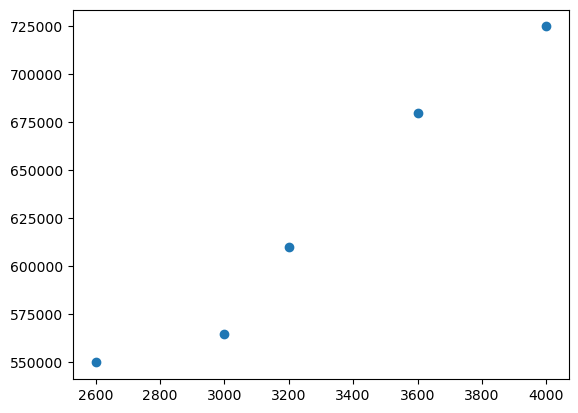

In [3]:
plt.scatter(df["Area"],
           df["Precio"]);

Como puedes observar, es evidente que mientras mayor es la superficie (en el eje `x`), mayor es el precio (en el eje `y`), pero sin embargo no podemos decir que esa relación es perfectamente proporcional, ya que en el mercado inmobiliario existen muchos otros factores que afectan al precio de las propiedades (además de la superficie) y por eso no podemos trazar una línea recta, o una curva constante, entre estos puntos.

Por lo tanto, si en el futuro ingresa una nueva propiedad, con la información que dispongo no puedo predecir con suficiente exactitud su *precio* en base a su *superficie*.

Ahí es donde entra Machine Learning con la **regresión lineal**.

En este ejemplo, quiero usar la regresión lineal para crear una *línea recta* en este gráfico, que represente la menor cantidad de errores posibles entre los valores que ya dispongo, y los valores promedio para cada posición.

Para dibujar esta línea, la regresión lineal aplica un algoritmo que va a resolver el siguiente problema: *¿dónde debo colocar la línea recta este gráfico, de modo tal que cada punto de información que dispongo, esté a la menor distancia posible de esta línea?*.

Entonces va a ir calculando la posición en el eje `y` para cada punto que dispongo del eje `x`, minimizando los errores (es decir la distancia entre el punto que tengo y el lugar donde pasará la línea recta), para luego poder hacer las mejores predicciones de precios posibles para otras propiedades con distintas superficies.

Pongamos manos a la obra. Primero vamos a **entrenar nuestro algoritmo**. Para eso necesitamos construir **dos variables**: La primera va a ser el conjunto de datos de entrada.

In [4]:
X = df[["Area"]]

Aquí te debes estar haciendo dos preguntas:
1. Por qué `X` está en mayúsculas
2. Por qué he usado doble corchete [[]]

Ambas preguntas se responden juntas. Normalmente cuando creamos gráficos debemos configurar sus ejes `x` e `y` pasándoles alguna serie de nuestros dataframes. En el caso de Machine Learning, aunque le estoy pasando solamente una columna (la serie `Area`), podría estar pasando muchas series (o columnas) al mismo tiempo, y eso significa que este eje debe tener un formato bidimensional (muchas columnas y muchas filas).

Al pasar `"Area"` con dos corchetes no lo estoy pasando como una serie, sino como un **DataFrame de una sola columna**, y por lo tanto es un tipo de dato distinto. Haz la prueba:

In [5]:
type(df[["Area"]])

pandas.core.frame.DataFrame

In [6]:
type(df["Area"])

pandas.core.series.Series

Y por esa misma razón (porque es un dataframe y no una serie) es que por convención no lo llamamos `x` en minúscula, sino `X` en mayúsculas.

Entonces ya tenemos la **primera variable** para entrenar a nuestro modelo, que es `X`, que contiene los datos de entrada, y que es la **variable independiente** de nuestro modelo. Es la variable de la que ya conocemos todos sus puntos posibles.

Ahora vamos a crear la **segunda variable**, que es la que contiene los datos de salida. Esta será la **variable dependiente**, y es la variable que queremos conocer:

In [7]:
y = df["Precio"]

Ahora que tenemos ambas variables, vamos a crear un **objeto de regresión lineal**, usando la librería que hemos importado:

In [8]:
modelo = linear_model.LinearRegression()

Ahora la variable modelo contiene la función `LinearRegression()`, por lo que podemos ir al siguiente paso, que es **entrenar** a ese modelo con los datos que tenemos:

In [9]:
modelo.fit(X, y)

LinearRegression()

Esta salida de la celda, básicamente significa que ya se ha realizado el entrenamiento. Nuestro modelo ha visto las relaciones entre los datos que disponemos y ya está preparado para decirnos cuál es la mejor predicción posible para el precio de una nueva propiedad según su superficie.

Lo probemos:

In [10]:
modelo.predict([[3300]])

C:\Users\Federico\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

Parece que si tenemos una casa de *3300 pies cuadrados*, es muy posible que su precio esté alrededor de los *628.715 dólares*.

Si bien este precio puede variar según muchos otros factores que intervienen en su cotización, en base a los casos existentes, podemos anticipar que este precio es el más razonable de esperar si necesitamos hacer especulaciones lo más acertadas posibles.

Pero esto no es todo, ahora usemos a este modelo de **regresión lineal** para **dibujar una línea recta** que represente esa relación.

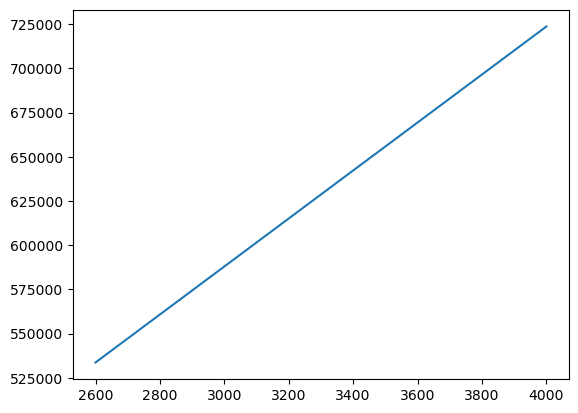

In [11]:
plt.plot(df["Area"],
        modelo.predict(X));

Y si juntamos nuestros dos gráficos en un solo axes, esto es lo que obtenemos:

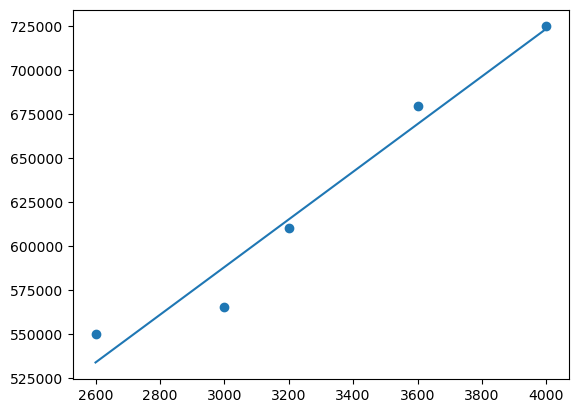

In [12]:
plt.scatter(df["Area"],
           df["Precio"])
plt.plot(df["Area"],
        modelo.predict(X));

Esta es la **Regresión Lineal**, uno de los *4 algoritmos* que disponemos para hacer **Aprendizaje Supervisado** en **Machine Learning**.

En la lección siguiente conoceremos al segundo de ellos, que es la **Regresión Logística**.